# TITANIC - Machine Learning from Disaster

- Será abordado neste projeto um conjunto de dados muito famoso do Titanic que faz parte de uma competição do Kaggle.

- [Clique aqui para acessar os dados disponíveis no Kaggle](https://www.kaggle.com/competitions/titanic)

- Objetivo do projeto é usar o aprendizado de máquina para **criar um modelo que preveja quais passageiros sobreviveram ao naufrágio do Titanic**

- É utilizado a **acurácia** para avaliar o resultado do modelo

**___________________________________________________________________________________________________________________________**

# DESCRIÇÃO DO DATASET

- **Variáveis**
    - Survival:	Sobrevivência (0 = Não, 1 = Sim)
    - Pclass: Classe do bilhete	(1 = 1º, 2 = 2º, 3 = 3º)
    - Sex: Gênero	
    - Age: Idade em anos	
    - Sibsp: Nº de irmãos/cônjuges a bordo do Titanic	
    - Parch: Nº de pais/filhos a bordo do Titanic		
    - Ticket: Número do bilhete		
    - Fare:	Tarifa do passageiro	
    - Cabin: Número da cabine	
    - Embarked:	Porto de embarcação	(C = Cherbourg, Q = Queenstown, S = Southampton)

&nbsp;

- **Notas de Variáveis**
    - pclass: Um proxy para status socioeconômico (SES)
        - 1º = Alto
        - 2º = Médio
        - 3º = Baixo
     - age: A idade é fracionária se for menor que 1. Se a idade for estimada, ela está no formato de xx.5
     - sibsp: O conjunto de dados define as relações familiares desta forma...
        - Irmão = irmão, irmã, meio-irmão, meia-irmã
        - Cônjuge = marido, esposa (amantes e noivos foram ignorados)
     - parch: O conjunto de dados define as relações familiares desta forma...
        - Pais = mãe, pai
        - Filho = filha, filho, enteada, enteado
        - Algumas crianças viajaram apenas com uma babá, portanto parch=0 para elas.

**___________________________________________________________________________________________________________________________**

# ETAPAS DO PROJETO
- [Importação](#importacao)
- [Análise Exploratória](#analise)
- [Tratamento](#tratamento)
- [Modelagem](#modelagem)
- [Avaliação](#avaliacao)
- [Previsão](#previsao)
- [Conclusão](#conclusao)
- [Resumo](#resumo)

**___________________________________________________________________________________________________________________________**
<a id='importacao'></a>
# IMPORTAÇÃO

In [167]:
# Importação de algumas bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [168]:
# Visualizando a base de treino
treino = pd.read_csv('dataset/train.csv')
treino.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [169]:
# Visualizando a base de teste
teste = pd.read_csv('dataset/test.csv')
teste.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


**___________________________________________________________________________________________________________________________**
<a id='analise'></a>
# ANÁLISE EXPLORATÓRIA

### Relatório ydata-profiling - Base de Treino
- Vamos utilizar o ydata-profiling para gerar um relatório que facilite nossa análise
- https://github.com/ydataai/ydata-profiling

In [170]:
# Importando o ProfileReport do ydata-profiling
from ydata_profiling import ProfileReport

In [171]:
# Gerando a visualização
report = ProfileReport(treino, title='titanic_treino_report')

In [172]:
# Criando o relatório html
report.to_file('titanic_treino_report.html')

C:\Users\Douglas\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

- **Análise do Relatório - Base de Treino** 

    - Sex is highly overall correlated with Survived
    - Age has 177 (19.9%) missing values
    - Cabin has 687 (77.1%) missing values
    - Embarked has 2 (0.2%) missing values
    - PassengerId has unique values
    - Name has unique values
    - SibSp has 608 (68.2%) zeros
    - Parch has 678 (76.1%) zeros
    - Fare has 15 (1.7%) zeros

### Analisando algumas informações das bases
- **Base de Treino**

In [173]:
# Informações da base de treino
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [174]:
# Estatística Decritiva
treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- **Base de Teste**

In [175]:
# Informações da base de teste
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [176]:
# Estatística Decritiva
teste.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Verificando os valores nulos

- **Base de Treino**

In [177]:
# Verificando as colunas com valores nulos
treino.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [178]:
# Quantidade de valores nulos em porcentagem
round((treino.isnull().sum()/treino.shape[0])*100, 2).sort_values(ascending=False).head(5)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
dtype: float64

<Axes: >

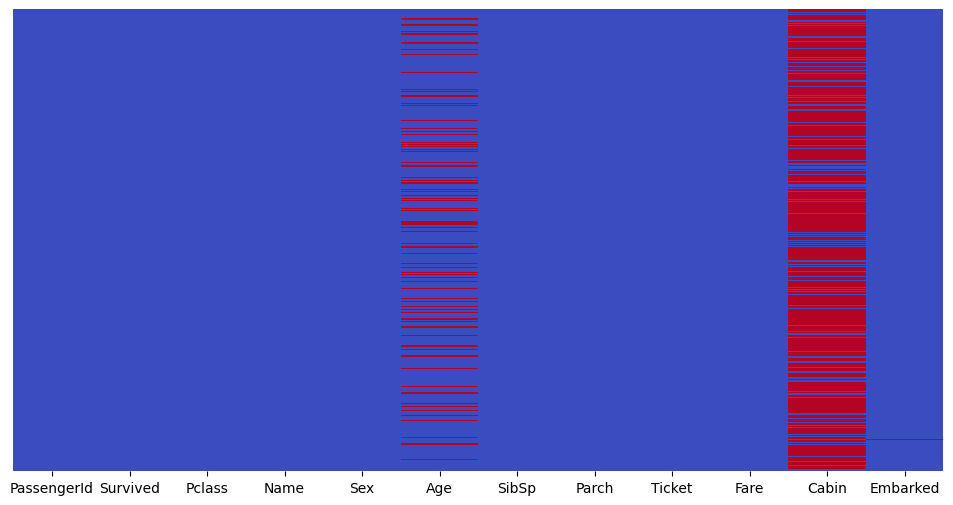

In [179]:
# Visualizando os valores nulos
plt.figure(figsize=(12, 6))
sns.heatmap(treino.isnull(), cbar=False, yticklabels=False, cmap='coolwarm')

- **Base de Teste**

In [180]:
# Verificando as colunas com valores nulos
teste.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

- **Comparação Base de Treino e Teste**

Valores Nulos   | Base de Treino
--------- | ------
Cabin | 687
Age | 177
Embarked | 2



Valores Nulos   | Base de Teste
--------- | ------
Cabin | 327
Age | 86
Fare | 1


- Temos colunas que **possuem valores vazios na base de teste que não estão vazias na base de treino** (nesse caso, precisaríamos tratar essas colunas apenas na base de teste)

### Verificando a cardinalidade

- **Base de Treino**

In [181]:
# Verificando a cardinalidade das colunas
treino.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

- A base de treino possue as seguintes colunas com alta cardinalidade
    - PassengerId    891
    - Name           891
    - Ticket         681
    - Fare           248
    - Cabin          147

### Verificando Outliers

- **Base de Treino**

In [182]:
# Estatística Descritiva
treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Vamos observar a coluna Fare

<Axes: >

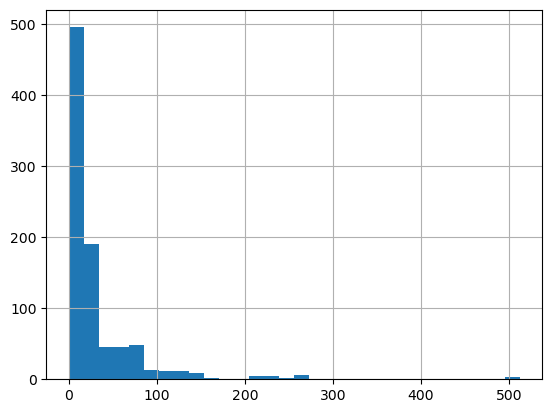

In [183]:
# Distribuição da coluna Fare
treino['Fare'].hist(bins=30)

<Axes: >

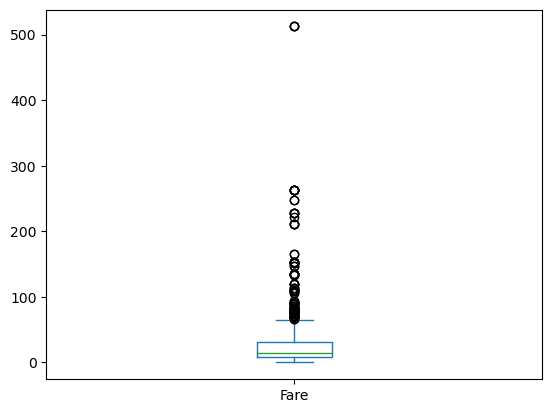

In [184]:
# Outra forma de visualizar a distribuição
treino['Fare'].plot.box()

- A coluna Fare possui valores discrepantes, vamos analisar com maiores detalhes

In [185]:
# Filtrando esses valores
treino[treino['Fare'] == treino['Fare'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


- Após uma pesquisa no google, verificamos que o valor 512 da tarifa esta correto, a passageira realmente pagou esta valor na passagem. Portanto mesmo sendo um valor discrepante, foi realmente pago e não um erro na coleta dos dados.

    - Mesmo que o outlier esteja correto precisamos analisar se faz sentido para o modelo
    - Esse valor faz sentido com os valores de passagem?
    - Ele pode ocorrer novamente?
    - https://www.encyclopedia-titanica.org/titanic-survivor/annie-moore-ward.html
    - https://www.encyclopedia-titanica.org/titanic-survivor/thomas-cardeza.html
    - https://www.encyclopedia-titanica.org/titanic-survivor/gustave-lesueur.html

### Verificando as colunas do tipo texto

- **Base de Treino**

In [186]:
# Tipo de cada coluna da base
treino.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [187]:
# Selecionando apenas as colunas de texto
col_text = treino.columns[treino.dtypes == 'object']
col_text

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [188]:
# Visualizando 
treino[col_text].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [189]:
# Quantidade de valores únicos de cada coluna do tipo texto
treino[col_text].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

- Precisaremos analisar como tratar cada coluna de texto
    - Codificar os valores?
    - Eliminar as colunas de texto com alta cardinalidade?

**___________________________________________________________________________________________________________________________**
<a id='tratamento'></a>
# TRATAMENTO

### Valores Nulos

In [190]:
# Verificando novamente valores vazios para a base de treino
treino.isnull().sum().sort_values(ascending=False).head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [191]:
# Verificando novamente valores vazios para a base de teste
teste.isnull().sum().sort_values(ascending=False).head(5)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
dtype: int64

### Tratando a Coluna Embarked - Base de Treino

In [192]:
# Verificando os registros com embarque vazio
treino[treino['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


- Após realizar uma pesquisa no google, foi possível identificar que as duas passageiras com valores nulos para embarque, embarcaram em Southampton (S).
    - [Icard, Miss. Amelie = Embarked: Southampton](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html)
    - [Stone, Mrs. George Nelson (Martha Evelyn) = Embarked: Southampton](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html)

In [193]:
# Visualizando os valores únicos e sua frequencia
treino['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [194]:
# Atualizando os valores nulos da coluna Embarked dos dois registros acima para "S" referente a Southampton
treino.loc[treino['Embarked'].isnull(), 'Embarked'] = 'S'

In [195]:
# Visualizando a atualização
treino.iloc[[61, 829], :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


**Colunas Tratadas**
- [x] Embarked - Treino
- [ ] Age - Treino e Teste
- [ ] Fare - Teste
- [ ] Cabin - Treino e Teste

### Tratando os Valores Nulos da Coluna Age - Base de Treino

In [196]:
# Estatística da coluna Age
treino['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

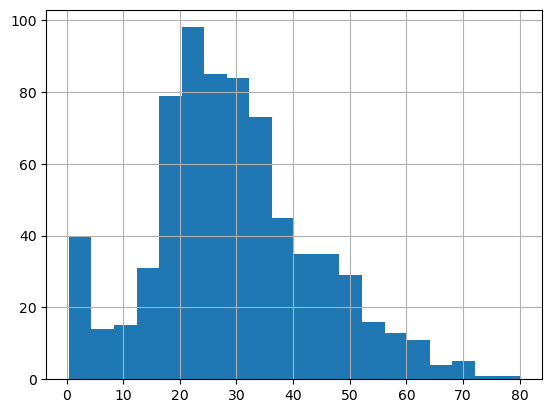

In [197]:
# Visualizando a distribuição das idades
treino['Age'].hist(bins=20)

<Axes: >

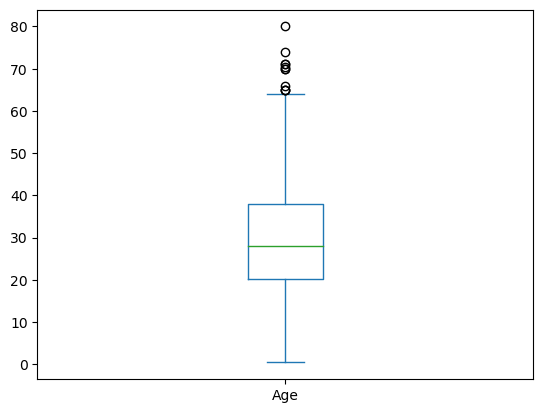

In [198]:
# Outra forma de visualizar a distribuição das idades
treino['Age'].plot.box()

In [199]:
# Correlação das colunas numéricas
treino.corr(numeric_only=True)['Age'].sort_values(ascending=False)

Age            1.000000
Fare           0.096067
PassengerId    0.036847
Survived      -0.077221
Parch         -0.189119
SibSp         -0.308247
Pclass        -0.369226
Name: Age, dtype: float64

In [200]:
# Mediana da idade de cada classe
treino.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [201]:
# Medina da idade por classe e sexo
treino.groupby(['Sex', 'Pclass'])['Age'].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [202]:
# Adicionando uma nova coluna com as medianas das idades de acordo com a classe e o sexo
treino['Age_median'] = treino.groupby(['Pclass', 'Sex'])['Age'].transform('median')
treino[['Sex', 'Pclass', 'Age_median']].head()

,Sex,Pclass,Age_median
0,male,3,25.0
1,female,1,35.0
2,female,3,21.5
3,female,1,35.0
4,male,3,25.0


- Analisando a diferença entre a idade real e a idade de acordo com a classe e o sexo

In [203]:
# Analisando a estatistica do erro
(treino['Age'] - treino['Age_median']).describe()

count    714.000000
mean       0.882591
std       13.291050
min      -39.080000
25%       -7.000000
50%        0.000000
75%        8.500000
max       49.000000
dtype: float64

(array([  3.,  27.,  72., 165., 192., 133.,  78.,  34.,   7.,   3.]),
 array([-39.08 , -30.272, -21.464, -12.656,  -3.848,   4.96 ,  13.768,
         22.576,  31.384,  40.192,  49.   ]),
 <BarContainer object of 10 artists>)

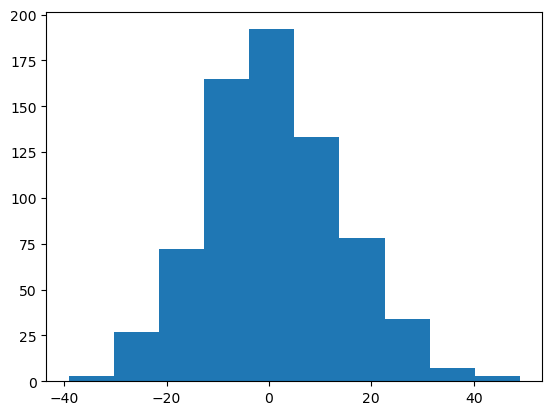

In [204]:
# Analisando o erro
plt.hist((treino['Age'] - treino['Age_median']))

- Com a média dos erros igual a 0.88 e mediana igual a zero, a abordagem de preencher os valores nulos das idades pelas idades de acordo com o sexo e a classe, pode ser uma boa alternativa. Vamos fazer isso.

In [205]:
# Preenchendo os valores nulos da coluna Age pela mediana
treino['Age_Check'] = treino['Age'].fillna(treino.groupby(['Pclass', 'Sex'])['Age'].transform('median'))
treino.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_Check
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,25.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21.5,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,25.0,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,25.0,25.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,40.0,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,25.0,2.0


- Observe agora na coluna "Age_Check", que os valores nulos das idades foram preenchidos pelas medianas. Vamos agora fazer o mesmo procedimento para a coluna "Age" e deletar as colunas "Age_median" e "Age_Check".

In [206]:
# Preenchendo os valores nulos da coluna Age pela mediana
treino['Age'].fillna(treino.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)

In [207]:
# Removendo as colunas 'Age_median' e 'Age_Check'
treino.drop(['Age_median', 'Age_Check'], axis=1, inplace=True)

In [208]:
# Visualizando a base de treino
treino.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Tratando os Valores Nulos da Coluna Age - Base de Teste
- Vamos fazer o mesmo procedimento acima, mas agora para a base de teste

In [209]:
# Valores nulos da base de teste
teste.isnull().sum().sort_values(ascending=False).head(4)

Cabin          327
Age             86
Fare             1
PassengerId      0
dtype: int64

In [210]:
# Preenchendo os valores nulos da coluna Age pela mediana
teste['Age'].fillna(teste.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)
teste.head(8)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S


In [211]:
# Valores nulos da base de teste
teste.isnull().sum().sort_values(ascending=False).head(4)

Cabin          327
Fare             1
PassengerId      0
Pclass           0
dtype: int64

**Colunas Tratadas**
- [x] Embarked - Treino
- [x] Age - Treino e Teste
- [ ] Fare - Teste
- [ ] Cabin - Treino e Teste

### Tratando os Valores Nulos da Coluna Fare - Base de Teste

In [212]:
# Visualizando o registro da base de teste com valor nulo em Fare
teste[teste['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


- Após uma pesquisa no google, identificamos o valor nulo da coluna Fare do passageiro acima. Fare = 7

    - https://www.encyclopedia-titanica.org/titanic-victim/thomas-storey.html

In [213]:
# Atualizando o valor nulo de Fare para 7.0
teste.loc[teste['Fare'].isnull(), 'Fare'] = 7.0

In [214]:
# Visualizando novamente o registro atualizado
teste.iloc[[152], :]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7.0,NaN,S


In [215]:
# Valores nulos da base de teste
teste.isnull().sum().sort_values(ascending=False).head(3)

Cabin          327
PassengerId      0
Pclass           0
dtype: int64

**Colunas Tratadas**
- [x] Embarked - Treino
- [x] Age - Treino e Teste
- [x] Fare - Teste
- [ ] Cabin - Treino e Teste

Agora falta tratar os valores nulos da coluna Cabin de ambas as bases

### Tratando a Coluna Cabin - Base de Treino e Teste

In [216]:
# Valores nulos
treino.isnull().sum().sort_values(ascending=False).head(3)

Cabin          687
PassengerId      0
Survived         0
dtype: int64

In [217]:
# Quantidade de valores únicos
treino['Cabin'].nunique()

147

In [218]:
# Valores únicos
treino['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- A coluna cabin será deletada pois possui muitos valores nulos e alta cardinalidade

In [219]:
# Removendo a coluna Cabin da base de treino
treino = treino.drop('Cabin', axis=1)

# Removendo a coluna Cabin da base de teste
teste = teste.drop('Cabin', axis=1)

**Colunas Tratadas**
- [x] Embarked - Treino
- [x] Age - Treino e Teste
- [x] Fare - Teste
- [x] Cabin - Treino e Teste

- Agora, terminamos de tratar os valores nulos da base de treino e teste e como podemos ver, a base não possui mais valores nulos

In [220]:
# Valores nulos base de treino
treino.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [221]:
# Valores nulos base de teste
teste.isnull().sum().sort_values(ascending=False)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Tratando a Coluna Sex - Base de Treino e Teste

- Para as colunas de texto, inicialmente vamos tratar apenas as colunas Sex e Embarked pois as outras colunas possuem alta cardinalidade.
- Caso seja necessário, podemos analisar com maiores detalhes as outras colunas e ver se elas podem agregar informações ao nosso modelo

In [222]:
# Colunas do tipo texto
col_text = treino.columns[treino.dtypes=='object']
col_text

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [223]:
# Cardinalidade das colunas do tipo texto
treino[col_text].nunique().sort_values(ascending=False)

Name        891
Ticket      681
Embarked      3
Sex           2
dtype: int64

- **Base de Treino**

In [224]:
# Vamos olhar novamente para o nosso Data Frame
treino.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [225]:
# Frequencia de cada sexo
treino['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

- Vamos transformar a coluna sexo para uma coluna com valor binário que será representada da seguinte forma:
    - male = 1
    - female = 0

In [226]:
# Transformando em binário e adicionando a base de dados
treino['Sex_male'] = pd.get_dummies(treino['Sex'], drop_first=True, dtype='int32')

In [227]:
# Frequencia de cada sexo
treino[['Sex','Sex_male']].value_counts()

Sex     Sex_male
male    1           577
female  0           314
Name: count, dtype: int64

In [228]:
# Agora podemos excluir a coluna Sex
treino.drop('Sex', axis=1, inplace=True)

In [229]:
# Visualizando a base de treino
treino.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1


- **Base de Teste**
    - Agora vamos fazer o mesmo procedimento para a base de teste

In [230]:
# Transformando em numerico e adicionando a base de dados
teste['Sex_male'] = pd.get_dummies(teste['Sex'], drop_first=True, dtype='int32')

In [231]:
# Agora podemos excluir a coluna Sex
teste.drop('Sex', axis=1, inplace=True)

In [232]:
# Visualizando a base de teste
teste.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,S,0


### Tratando a Coluna Embarked - Base de Treino e Teste

- Agora, vamos tratar a coluna **Embarked** usando o **[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)** que irá **criar uma nova coluna para cada um dos rótulos da coluna original**

In [233]:
# importando o OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

- **Base de Treino**

In [234]:
# Frequencia de cada valor da coluna embarked
treino['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [235]:
# Criando o encoder
ohe = OneHotEncoder(handle_unknown='ignore',dtype='int32')

In [236]:
# Fazendo o fit_transform
ohe.fit_transform(treino[['Embarked']]).toarray()

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [237]:
# Nomes das colunas
ohe.get_feature_names_out()

array(['Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [238]:
# Criando um dataframe com os valores transformados
ohe_df_treino = pd.DataFrame(ohe.fit_transform(treino[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())
ohe_df_treino.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [239]:
# Concatenando as duas colunas
treino = pd.concat([treino, ohe_df_treino], axis=1)

In [240]:
# Visualizando a base
treino[['Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].value_counts()

Embarked  Embarked_C  Embarked_Q  Embarked_S
S         0           0           1             646
C         1           0           0             168
Q         0           1           0              77
Name: count, dtype: int64

- A coluna Embarked tinha os valores S, C e Q.
- Após a transformação, cada um dos valores se tornaram colunas com valores entre 0 e 1.
- Quando o registro é igual a "S", a coluna Embarked_S recebe o valor de 1 a as outras o valor 0

In [241]:
# Podemos agora eliminar a coluna Embarked
treino.drop('Embarked', axis=1, inplace=True)

In [242]:
# Visualizando o dataframe
treino.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1


- **Base de Teste**
    - Vamos fazer o mesmo procedimento para a base de teste

In [243]:
# Criando um dataframe
ohe_df_teste = pd.DataFrame(ohe.transform(teste[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())

In [244]:
# Concatenando as duas colunas
teste = pd.concat([teste, ohe_df_teste], axis=1)

In [245]:
# Podemos agora eliminar a coluna Embarked
teste.drop('Embarked', axis=1, inplace=True)

In [246]:
# Visualizando o dataframe
teste.head(3)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,0,1,0


### Tratando a Coluna Name e Ticket - Base de Treino e Teste

- Inicialmente vamos eliminar as colunas 'Name' e 'Ticket' pois ambas possuem alta cardinalidade que podem prejudicar o nosso modelo. Caso seja necessário, mais a diante podemos analisá-las novamente com maiores detalhes

In [247]:
# Quantidade de valores únicos
treino[['Name', 'Ticket']].nunique()

Name      891
Ticket    681
dtype: int64

In [248]:
# Removendo as colunas
treino.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Removendo as colunas
teste.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [249]:
# Visualizando a base de treino
treino.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1


In [250]:
# Visualizando a base de teste
teste.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,1,0


**___________________________________________________________________________________________________________________________**
<a id='modelagem'></a>
# MODELAGEM

- Para começar, vamos testar os seguintes modelos:
    - **Decision Tree**
        - https://scikit-learn.org/stable/modules/tree.html#classification
    - **KNeighborsClassifier**
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
    - **Logistic Regression**
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

- Antes de usar os algoritmos, precisamos separar a base de treino em **treino e validação**
    - Vamos fazer isso utilizando o **train_test_split**
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [251]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [252]:
# Separando a base de treino em X e y
X = treino.drop(['PassengerId','Survived'],axis=1)
y = treino['Survived']

In [253]:
# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

### Decision Tree

In [254]:
# Fazendo a importação
from sklearn import tree

In [255]:
# Criando o classificador
clf_ac = tree.DecisionTreeClassifier(random_state=42)

In [256]:
# Fazendo o fit com os dados
clf_ac = clf_ac.fit(X_train,y_train)

In [257]:
# Fazendo a previsão
y_pred_ac = clf_ac.predict(X_val)

### KNeighborsClassifier

In [258]:
# Importando
from sklearn.neighbors import KNeighborsClassifier

In [259]:
# Criando o classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [260]:
# Fazendo o fit com os dados
clf_knn = clf_knn.fit(X_train,y_train)

In [261]:
# Fazendo a previsão
y_pred_knn = clf_knn.predict(X_val)

### Logistic Regression

In [262]:
# Importando
from sklearn.linear_model import LogisticRegression

In [263]:
# Criando o classificador
clf_rl = LogisticRegression(random_state=42, max_iter=400)

In [264]:
# Fazendo o fit com os dados
clf_rl = clf_rl.fit(X_train,y_train)

In [265]:
# Fazendo a previsão
y_pred_rl = clf_rl.predict(X_val)

**___________________________________________________________________________________________________________________________**
<a id='avaliacao'></a>
# AVALIAÇÃO

- Para fazer essa análise, podemos usar:
    - Acurácia (método de avaliação usado na competição):
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    - Matriz de confusão (ajuda a visualizar a distribuição dos erros):
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

### Acurácia

In [266]:
# Importando
from sklearn.metrics import accuracy_score

In [267]:
# Para a árvore
arvore = accuracy_score(y_val, y_pred_ac)
print('Acurácia DecisionTree:', arvore)

Acurácia DecisionTree: 0.7661016949152543


In [268]:
# Para o knn
knn = accuracy_score(y_val, y_pred_knn)
print('Acurácia KNN:', knn)

Acurácia KNN: 0.7322033898305085


In [269]:
# Para a regressão logística
reg_log = accuracy_score(y_val, y_pred_rl)
print('Acurácia LogisticRegression:', reg_log)

Acurácia LogisticRegression: 0.823728813559322


### Matriz de confusão

In [270]:
# Importando
from sklearn.metrics import confusion_matrix

In [271]:
# Para a árvore
confusion_matrix(y_val, y_pred_ac)

array([[142,  33],
       [ 36,  84]], dtype=int64)

In [272]:
# Para o knn
confusion_matrix(y_val, y_pred_knn)

array([[147,  28],
       [ 51,  69]], dtype=int64)

In [273]:
# Para a regressão logística
confusion_matrix(y_val, y_pred_rl)

array([[154,  21],
       [ 31,  89]], dtype=int64)

**___________________________________________________________________________________________________________________________**
<a id='previsao'></a>
# PREVISÃO

### Fazendo a previsão para os dados de teste
- Vamos usar o modelo com melhor precisão para fazer o predict na base de teste

In [274]:
# Visualizando o X_train
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,1,0,0,1
718,3,25.0,0,0,15.5000,1,0,1,0
685,2,25.0,1,2,41.5792,1,1,0,0


In [275]:
# Visualizando a base de teste
teste.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,1,0


In [276]:
# Para a base de teste ser igual a base de treino, precisamos eliminar a coluna PassengerId
X_teste = teste.drop("PassengerId",axis=1)

- Para fazer previsão nos dados de teste, vamos treinar novamente o modelo com a melhor acurácia, mas agora com todos os valores de treino

In [277]:
# Importando
from sklearn.linear_model import LogisticRegression

# Criando o classificador
clf_rl = LogisticRegression(random_state=42, max_iter=400)

# Fazendo o fit com TODOS os dados de treino
clf_rl = clf_rl.fit(X, y)

- Fazendo a previsão nos dados de teste, os dados que ainda não foram "vistos" pelo nosso modelo

In [278]:
# Utilizando a regressão logística na base de teste
y_pred = clf_rl.predict(X_teste)

In [279]:
# Criando uma nova coluna com a previsão na base de teste
teste['Survived'] = y_pred

In [280]:
# Selecionando apenas a coluna de Id e Survived para fazer o envio
base_envio = teste[['PassengerId','Survived']]
base_envio.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [281]:
# Exportando para um csv
base_envio.to_csv('submission/submission_parte1.csv',index=False)

- Agora que temos os resultados previstos pelo nosso modelo, podemos ir ao [Kaggle](https://www.kaggle.com/competitions/titanic/submissions) e fazer a submissão e verificar qual foi a acurácia do modelo.

**___________________________________________________________________________________________________________________________**
<a id='conclusao'></a>
# CONCLUSÃO

- Após a submissão do 'submission_parte1.csv' no Kaggle, obtivemos um Score: 0.76076

**Melhorias**
- Analisar se a coluna Name possui informações que possam ser úteis ao nosso modelo
- Classificar a coluna Age
- Analisar as colunas SibSp e Parch
- Entender a relação das colunas Pclass e Fare
    

**___________________________________________________________________________________________________________________________**
<a id='resumo'></a>
# RESUMO


**Tratamento**
- Coluna Embarked valores nulos atualizados com o valor "S"
- Coluna Fare valores nulos atualizados com o valor 7.0
- Coluna Age, os valores nulos foram substituidos pela mediana das idades de acordo com a classe (Pclass) e o sexo (Sex)
- Coluna Cabin foi removida devido a alta cardinalidade e muitos valores nulos
- Coluna Sex foi transformada para numérica com valores 1 para male e 0 para female
- Coluna Embarked foi transformada em numérica utilizando o método OneHotEncoder
- Coluna Name e Ticket foi removida por possuir alta cardinalidade

**Modelagem e Avaliação**
- Foram criados três modelos para fazer a previsão
    - Acurácia DecisionTree: 0.76
    - Acurácia KNN: 0.73
    - Acurácia LogisticRegression: 0.82

**Submissão Kaggle (LogisticRegression)**
- Score: 0.76076

### Código dos tratamentos
```
# Tratando a Coluna Embarked - Base de Treino
treino.loc[treino['Embarked'].isnull(), 'Embarked'] = 'S'

# Tratando a Coluna Age - Base de Treino e Teste
treino['Age'].fillna(treino.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)
teste['Age'].fillna(teste.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)

# Tratando a Coluna Fare - Base de Teste
teste.loc[teste['Fare'].isnull(), 'Fare'] = 7.0

# Tratando a Coluna Sex - Base de Treino e Teste
treino['Sex_male'] = pd.get_dummies(treino['Sex'], drop_first=True, dtype='int32')
teste['Sex_male'] = pd.get_dummies(teste['Sex'], drop_first=True, dtype='int32')

# Tratando a Coluna Embarked - Base de Treino e Teste
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',dtype='int32')

ohe_df_treino = pd.DataFrame(ohe.fit_transform(treino[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())
treino = pd.concat([treino, ohe_df_treino], axis=1)

ohe_df_teste = pd.DataFrame(ohe.transform(teste[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())
teste = pd.concat([teste, ohe_df_teste], axis=1)

# Removendo as colunas
treino.drop(['Cabin', 'Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

# Removendo as colunas
teste.drop(['Cabin', 'Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
```